<a href="https://colab.research.google.com/github/Amitish/Web_Scrapping/blob/main/Web_Scrapping_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Provide URL from which data needs to be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2020'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup to access the data
soup=BeautifulSoup(page.text,'html.parser')
# Making data look more beautiful and clean
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here

mov_links = []
hyp = soup.find_all('a', class_="title-list-grid__item--link")

for url in hyp:
    mov_links.append(url.get('href'))

mov_hyp = ["https://www.justwatch.com" + link for link in mov_links]

print(mov_hyp)


['https://www.justwatch.com/in/movie/hanu-man', 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch.com/in/movie/fighter-2022', 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'https://www.justwatch.com/in/movie/bramayugam', 'https://www.justwatch.com/in/movie/poor-things', 'https://www.justwatch.com/in/movie/animal-2022', 'https://www.justwatch.com/in/movie/dune-2021', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/road-house-2024', 'https://www.justwatch.com/in/movie/12th-fail', 'https://www.justwatch.com/in/movie/anyone-but-you', 'https://www.justwatch.com/in/movie/murder-mubarak', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/aattam', 'https://www.justwatch.com/in/movie/black-magic-2024', 'https:

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here

movie_titles = []

for url in mov_hyp:
  ti = url.split('/')[-1]                # to get name present after the last '/'
  one = ti.replace("-", " ")               # replacing - with a space
  two = one.title()                             # to make name into a proper title
  movie_titles.append(two)

movie_titles

['Hanu Man',
 'Untitled Shahid Kapoor Kriti Sanon Film',
 'Oppenheimer',
 'Fighter 2022',
 'Anatomie Dune Chute',
 'Bramayugam',
 'Poor Things',
 'Animal 2022',
 'Dune 2021',
 'Manjummel Boys',
 'Premalu',
 'Road House 2024',
 '12Th Fail',
 'Anyone But You',
 'Murder Mubarak',
 'The Crew 2024',
 'Dune Part Two',
 'Aattam',
 'Black Magic 2024',
 'Article 370',
 'Sam Bahadur',
 'Merry Christmas 2024',
 'Godzilla X Kong The New Empire',
 'The Beekeeper 2024',
 'Madame Web',
 'Laapataa Ladies',
 'Salaar',
 'Eagle 2024',
 '365 Days',
 'Kung Fu Panda 4',
 'Anweshippin Kandethum',
 'Abraham Ozler',
 'The Kerala Story',
 'Aquaman And The Lost Kingdom',
 'Godzilla Vs Kong',
 'Madgaon Express',
 'Lover 2024',
 'Godzilla Minus One',
 'Ferrari',
 'Dunki',
 'Gaami',
 'Main Atal Hoon',
 'Mission Chapter 1',
 'Migration',
 'Dj Tillu',
 'The Holdovers',
 'Aadujeevitham',
 'Damsel 2023',
 'Operation Valentine',
 'Chaari 111',
 'She Said',
 'Zara Hatke Zara Bach Ke',
 'Yodha 2022',
 'The Gentlemen',
 'P

## **Scrapping release Year**

In [ ]:
# Write Your Code here

years = []

for year in mov_hyp:
    # Sending an HTTP GET request to the URL
    page = requests.get(year)
    # Parsing the HTML content using BeautifulSoup with the 'html.parser'
    soup = BeautifulSoup(page.text, 'html.parser')
    # Scrapping using span tag with class 'text-muted'
    year_element = soup.find('span', class_='text-muted')
    if year_element:
        year = year_element.text.strip()
        years.append(year)

print("Release Years: ",years)

Release Years:  ['(2024)', '(2024)', '(2023)', '(2024)', '(2023)', '(2024)', '(2023)', '(2023)', '(2021)', '(2024)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2024)', '(2020)', '(2024)', '(2024)', '(2024)', '(2023)', '(2023)', '(2021)', '(2024)', '(2023)', '(2023)', '(2023)', '(2024)', '(2024)']


In [ ]:
mov_rl = []
for i in years:
  a = i.replace("("," ").replace(")"," ")
  b = a.strip(" ")
  mov_rl.append(b)
mov_rl

['2024',
 '2024',
 '2023',
 '2024',
 '2023',
 '2024',
 '2023',
 '2023',
 '2021',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2020',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2021',
 '2024',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024']

## **Scrapping Genres**

In [ ]:
# Write Your Code here

genres = []

for genre in mov_hyp:
    page = requests.get(genre)
    soup = BeautifulSoup(page.text, 'html.parser')
    genres_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')
    if genres_heading:
        genres_div = genres_heading.find_next_sibling('div', class_='detail-infos__value')
        if genres_div:
            genres_text = genres_div.get_text(strip=True)
            genres.append(genres_text)

print("Genres: ",genres)


Genres:  ['Comedy, Science-Fiction, Fantasy, Action & Adventure', 'Romance, Science-Fiction, Comedy, Drama', 'Drama, History', 'Action & Adventure, Mystery & Thriller, War & Military', 'Mystery & Thriller, Crime, Drama', 'Horror, Mystery & Thriller', 'Science-Fiction, Romance, Comedy, Drama', 'Crime, Drama, Action & Adventure, Mystery & Thriller', 'Science-Fiction, Action & Adventure, Drama', 'Mystery & Thriller', 'Romance, Comedy', 'Mystery & Thriller, Action & Adventure', 'Comedy, Romance', 'Crime, Drama, Mystery & Thriller', 'Drama, Action & Adventure', 'Action & Adventure, Mystery & Thriller, Sport', 'Comedy, Drama, Kids & Family, Romance', 'Action & Adventure, Mystery & Thriller']


## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here

ratings = []
ratings_1 = []

for rating in mov_hyp:
  page=requests.get(rating)
  soup=BeautifulSoup(page.text,'html.parser')
  for div in soup.find_all('div', class_ = 'detail-infos__value'):
    for img in div.find_all('img', alt = 'IMDB'):
        for rat in img.find_next_sibling('span'):
          ratings.append(rat.text)

#print(ratings)
for i in ratings:
  a = i.split(",")
  ratings_1.append(a)

print("Ratings: ", ratings_1)

Ratings:  [[' 8.0  (21k) '], [' 8.0  (21k) '], [' 7.9  (234k) '], [' 7.9  (234k) '], [' 7.0  (24k) '], [' 7.0  (24k) '], [' 8.3  (47k) '], [' 8.3  (47k) '], [' 5.2  '], [' 5.2  '], [' 7.6  (87k) '], [' 7.6  (87k) '], [' 6.9  '], [' 6.9  ']]


In [ ]:
imdb_lst = []
for i in ratings_1:
  for j in i:
    a = j.split(" ")
    imdb_lst.append(a[1])
imdb_lst

['8.0',
 '8.0',
 '7.9',
 '7.9',
 '7.0',
 '7.0',
 '8.3',
 '8.3',
 '5.2',
 '5.2',
 '7.6',
 '7.6',
 '6.9',
 '6.9']

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

runtimes = []

for runtime in mov_hyp:
    page = requests.get(runtime)
    soup = BeautifulSoup(page.text, 'html.parser')
    runtime_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
    if runtime_heading:
        runtime_div = runtime_heading.find_next_sibling('div', class_='detail-infos__value')
        if runtime_div:
            runtime = runtime_div.get_text(strip=True)
            runtimes.append(runtime)

print("Runtime/Duration: ",runtimes)


Runtime/Duration:  ['2h 39min', '2h 21min', '3h 0min', '2h 19min', '2h 23min', '2h 10min', '2h 56min', '2h 28min', '2h 27min']


## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

age_ratings = []

for rating in mov_hyp:
    page = requests.get(rating)
    soup = BeautifulSoup(page.text, 'html.parser')
    tags = soup.find_all('h3', class_='detail-infos__subheading', string='Age rating')
    if tags:
        for tag in tags:
            tag2 = tag.find_next_sibling('div', class_='detail-infos__value')
            if tag2:
                age_rating = tag2.get_text(strip=True)
                age_ratings.append(age_rating)

print("Age Rating: ",age_ratings)


Age Rating:  ['UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'A', 'A']


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here

countries = []

for url in mov_hyp:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    tag = soup.find('h3', class_='detail-infos__subheading', string='Production country')
    if tag:
        tag2 = tag.find_next_sibling('div', class_='detail-infos__value')
        if tag2:
            country = tag2.get_text(strip=True)
            countries.append(country)

print(countries)


[]


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here

streaming = []

for stream in mov_hyp:

    page = requests.get(stream)
    soup = BeautifulSoup(page.text, 'html.parser')
    pictures = soup.find_all('picture', class_='picture-wrapper')
    if pictures:
        img = pictures[0].find('img', class_='offer__icon')
        if img:
            streaming.append(img['alt'])

print("Streaming Service: ", streaming)


Streaming Service:  ['Jio Cinema', 'Amazon Prime Video', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Apple TV']


## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

# Dictionary with the first 5 entries
mov_dict = {
    'TITLE': movie_titles[:5],
    'URL': mov_hyp[:5],
    'RELEASE YEAR': mov_rl[:5],
    'GENRE': genres[:5],
    'IMDB RATING': imdb_lst[:5],
    'DURATION': runtimes[:5],
    'RATING': age_ratings[:5],
    'STREAMING': streaming[:5]
}

# DataFrame
movies_dataframe = pd.DataFrame(mov_dict)
movies_dataframe


,TITLE,URL,RELEASE YEAR,GENRE,IMDB RATING,DURATION,RATING,STREAMING
0,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,"Comedy, Science-Fiction, Fantasy, Action & Adv...",8.0,2h 39min,UA,Jio Cinema
1,Untitled Shahid Kapoor Kriti Sanon Film,https://www.justwatch.com/in/movie/untitled-sh...,2024,"Romance, Science-Fiction, Comedy, Drama",8.0,2h 21min,UA,Amazon Prime Video
2,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,"Drama, History",7.9,3h 0min,UA,Apple TV
3,Fighter 2022,https://www.justwatch.com/in/movie/fighter-2022,2024,"Action & Adventure, Mystery & Thriller, War & ...",7.9,2h 19min,UA,Amazon Prime Video
4,Anatomie Dune Chute,https://www.justwatch.com/in/movie/anatomie-du...,2023,"Mystery & Thriller, Crime, Drama",7.0,2h 23min,UA,Amazon Prime Video


## **Scraping TV  Show Data**

In [ ]:
# Scraping TV show Data

tv_show ='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

page=requests.get(tv_show)

soup=BeautifulSoup(page.text,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here

tv_shows_url = ["https://www.justwatch.com" + url.get('href')
for url in soup.find_all('a', class_='title-list-grid__item--link')]
tv_shows_url

['https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/the-gentlemen',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/maharani-2021',
 'https://www.justwatch.com/in/tv-show/maamla-legal-hai',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/inspector-rishi',
 'https://www.justwatch.com/in/tv-show/invincible',
 'https://www.justwatch.com/in/tv-show/ripley',
 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen',
 'https://www.justwatch.com/in/tv-show/halo',
 'https://www.justwatch.com/in/tv-show/save-the-tigers',
 'https://www.justwatch.com

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here

tv_shows_title = [url.split('/')[-1].replace("-", " ").title() for url in tv_shows_url]
tv_shows_title

['Shogun 2024',
 'Mirzapur',
 '3 Body Problem',
 'Panchayat',
 'Game Of Thrones',
 'The Gentlemen',
 'Solo Leveling 2024',
 'Sunflower 2021',
 'Maharani 2021',
 'Maamla Legal Hai',
 'Apharan',
 'Attack On Titan',
 'Inspector Rishi',
 'Invincible',
 'Ripley',
 'Jujutsu Kaisen',
 'Halo',
 'Save The Tigers',
 'Young Sheldon',
 'Farzi',
 'Mastram',
 'Avatar The Last Airbender',
 'Fallout',
 'Untitled Kapil Sharma Netflix Project',
 'A Gentleman In Moscow',
 'Queen Of Tears',
 'True Detective',
 'Lootere',
 'Loki',
 'Parasyte The Grey',
 'Jack Reacher',
 'Naruto',
 'Scam 1992',
 'The Family Man',
 'Naruto Shippuden',
 'Gandii Baat',
 '9 1 1',
 'Supersex',
 'Euphoria',
 'Yellowstone',
 'Paperhouse',
 'Gullak',
 'House Of The Dragon',
 'Under The Dome',
 'X Men 97',
 'The Rookie',
 'Breaking Bad',
 'Turning Point The Bomb And The Cold War',
 'Lucifer',
 'Peaky Blinders',
 'The Vampire Diaries',
 'Testament The Story Of Moses',
 'Dark Desire',
 'Aashram',
 'Dehati Ladke',
 'Modern Family',
 'G

## **Fetching Release Year**

In [ ]:
# Write Your Code here

rel_year = []

for url in tv_shows_url:
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'html.parser')
  year_element = soup.find('span', class_='text-muted')
  if year_element:
    year = year_element.text.strip()
    rel_year.append(year)

print("Release Year: ",rel_year)


Release Year:  ['(2024)', '(2018)', '(2024)', '(2020)', '(2011)', '(2024)', '(2024)', '(2021)', '(2021)', '(2024)', '(2018)', '(2013)', '(2024)', '(2021)', '(2024)', '(2020)', '(2022)', '(2023)', '(2017)', '(2023)', '(2020)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2014)', '(2024)', '(2021)', '(2024)', '(2022)', '(2002)', '(2020)', '(2019)', '(2007)', '(2018)', '(2019)', '(2023)', '(2011)', '(2024)']


In [ ]:
rl = []
for i in rel_year:
  a = i.replace("("," ").replace(")"," ")
  b = a.strip(" ")
  rl.append(b)
rl

['2024',
 '2018',
 '2024',
 '2020',
 '2011',
 '2024',
 '2024',
 '2021',
 '2021',
 '2024',
 '2018',
 '2013',
 '2024',
 '2021',
 '2024',
 '2020',
 '2022',
 '2023',
 '2017',
 '2023',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2014',
 '2024',
 '2021',
 '2024',
 '2022',
 '2002',
 '2020',
 '2019',
 '2007',
 '2018',
 '2019',
 '2023',
 '2011',
 '2024']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

tv_shows_genre = []

for genre in tv_shows_url:
    page = requests.get(genre)
    soup = BeautifulSoup(page.text, 'html.parser')
    genre_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')
    if genre_heading:
        genre_value = genre_heading.find_next_sibling('div', class_='detail-infos__value')
        if genre_value:
            genre_text = genre_value.text.strip()
            tv_shows_genre.append(genre_text)

print(tv_shows_genre)

['Drama, War & Military, History', 'Crime, Action & Adventure, Drama, Mystery & Thriller', 'Science-Fiction, Mystery & Thriller, Drama, Fantasy', 'Comedy, Drama', 'Action & Adventure, Drama, Fantasy, Science-Fiction', 'Action & Adventure, Comedy, Crime, Drama', 'Action & Adventure, Fantasy, Animation, Science-Fiction', 'Comedy, Crime', 'Drama', 'Drama, Comedy', 'Drama, Action & Adventure, Crime, Mystery & Thriller', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Horror, Mystery & Thriller, Action & Adventure, Drama', 'Drama, Animation, Science-Fiction, Action & Adventure, Mystery & Thriller, Fantasy', 'Mystery & Thriller, Crime, Drama', 'Animation, Action & Adventure, Fantasy, Mystery & Thriller, Science-Fiction', 'Action & Adventure, Science-Fiction, Mystery & Thriller, War & Military', 'Comedy, Drama, Mystery & Thriller', 'Comedy, Kids & Family', 'Crime, Drama, Mystery & Thriller', 'Drama, Comedy, Fantasy', 'Science-Fiction, Action & Adventure, Fantasy, Co

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here

tv_shows_imdb = []

for imdb in tv_shows_url:
    page = requests.get(imdb)
    soup = BeautifulSoup(page.text, 'html.parser')
    for div in soup.find_all('div', class_='detail-infos__value'):
        img = div.find('img', alt='IMDB')
        if img:
            rating_span = img.find_next_sibling('span')
            if rating_span:
                rating_text = rating_span.text.strip()
                tv_shows_imdb .append(rating_text)

print(tv_shows_imdb)


['9.1  (59k)', '9.1  (59k)', '8.5  (81k)', '8.5  (81k)', '7.7  (72k)', '7.7  (72k)', '8.9  (84k)', '8.9  (84k)', '9.2  (2m)', '9.2  (2m)', '8.2  (77k)', '8.2  (77k)', '8.4  (16k)', '8.4  (16k)', '7.5  (23k)', '7.5  (23k)', '8.1  (9k)', '8.1  (9k)', '7.3  (3k)', '7.3  (3k)', '8.0  (70k)', '8.0  (70k)', '7.5  (367k)', '7.5  (367k)', '9.1  (12k)', '9.1  (12k)', '7.9  (39k)', '7.9  (39k)']


In [ ]:
imdb_tv = []
for i in tv_shows_imdb:
  a = i.split(" ")
  for j in range(1):
    imdb_tv.append(a[0])

imdb_tv

['9.1',
 '9.1',
 '8.5',
 '8.5',
 '7.7',
 '7.7',
 '8.9',
 '8.9',
 '9.2',
 '9.2',
 '8.2',
 '8.2',
 '8.4',
 '8.4',
 '7.5',
 '7.5',
 '8.1',
 '8.1',
 '7.3',
 '7.3',
 '8.0',
 '8.0',
 '7.5',
 '7.5',
 '9.1',
 '9.1',
 '7.9',
 '7.9']

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here

tv_shows_rating = []

for rating in tv_shows_url:
    page = requests.get(rating)
    soup = BeautifulSoup(page.text, 'html.parser')
    tags = soup.find_all('h3', class_='detail-infos__subheading', string='Age rating')
    if tags:
        for tag in tags:
            tag2 = tag.find_next_sibling('div', class_='detail-infos__value')
            tv_shows_rating.append(tag2.text)

print(tv_shows_rating)


['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'U', 'U', 'A', 'A', 'U', 'U', 'A', 'A', 'U', 'U', 'A', 'A', 'U', 'U']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here

tv_shows_country = []

for url in tv_shows_url:
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    tags = soup.find_all('h3', class_='detail-infos__subheading', string='Production country')
    if tags:
        for tag in tags:
            tag2 = tag.find_next_sibling('div', class_='detail-infos__value')
            tv_shows_country.append(tag2.text.strip())

print(tv_shows_country)


[]


## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here

tv_shows_stream = []
for stream in tv_shows_url:
    page = requests.get(stream)
    soup = BeautifulSoup(page.text, 'html.parser')
    picture_tv = soup.find_all('picture', class_='picture-wrapper')
    if picture_tv:
        img = picture_tv[0].find('img', class_='offer__icon')
        tv_shows_stream.append(img['alt'])

print(tv_shows_stream)


['Amazon Prime Video', 'Hotstar', 'Netflix', 'Hotstar', 'Apple TV Plus']


## **Fetching Duration Details**

In [ ]:
# Write Your Code here

tv_shows_dur = []

for dur in tv_shows_url:
    page = requests.get(dur)
    soup = BeautifulSoup(page.text, 'html.parser')
    tags = soup.find_all('h3', class_='detail-infos__subheading', string='Runtime')
    for tag in tags:
        tag2 = tag.find_next_sibling('div', class_='detail-infos__value')
        tv_shows_dur.append(tag2.text.strip())

print(tv_shows_dur)


['24min', '24min', '28min', '28min', '43min', '43min', '1h 25min', '1h 25min', '54min', '54min', '24min', '24min', '50min', '50min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here

# Dictionary with the first 5 entries
tv_dict = {
    'TITLE': tv_shows_title[:5],
    'URL': tv_shows_url[:5],
    'RELEASE YEAR': rl[:5],
    'GENRE': tv_shows_genre[:5],
    'IMDB RATING': imdb_tv[:5],
    'DURATION': tv_shows_dur[:5],
    'RATING': tv_shows_rating[:5],
    'STREAMING': tv_shows_stream[:5]
}

# DataFrame
tv_shows_dataframe = pd.DataFrame(tv_dict)
tv_shows_dataframe

,TITLE,URL,RELEASE YEAR,GENRE,IMDB RATING,DURATION,RATING,STREAMING
0,Shogun 2024,https://www.justwatch.com/in/tv-show/shogun-2024,2024,"Drama, War & Military, History",9.1,24min,A,Amazon Prime Video
1,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",9.1,24min,A,Hotstar
2,3 Body Problem,https://www.justwatch.com/in/tv-show/3-body-pr...,2024,"Science-Fiction, Mystery & Thriller, Drama, Fa...",8.5,28min,A,Netflix
3,Panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Comedy, Drama",8.5,28min,A,Hotstar
4,Game Of Thrones,https://www.justwatch.com/in/tv-show/game-of-t...,2011,"Action & Adventure, Drama, Fantasy, Science-Fi...",7.7,43min,A,Apple TV Plus


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here

# Correcting the datatype of 2 columns
movies_dataframe.info()
movies_dataframe["IMDB RATING"] = pd.to_numeric(movies_dataframe["IMDB RATING"], errors='coerce')
movies_dataframe["RELEASE YEAR"] = movies_dataframe["RELEASE YEAR"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         5 non-null      object 
 1   URL           5 non-null      object 
 2   RELEASE YEAR  5 non-null      int64  
 3   GENRE         5 non-null      object 
 4   IMDB RATING   5 non-null      float64
 5   DURATION      5 non-null      object 
 6   RATING        5 non-null      object 
 7   STREAMING     5 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 448.0+ bytes


In [ ]:
tv_shows_dataframe.info()

# Correcting the datatype of 2 columns
tv_shows_dataframe["IMDB RATING"] = pd.to_numeric(tv_shows_dataframe["IMDB RATING"], errors='coerce')
tv_shows_dataframe["RELEASE YEAR"] = tv_shows_dataframe["RELEASE YEAR"].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         5 non-null      object 
 1   URL           5 non-null      object 
 2   RELEASE YEAR  5 non-null      int64  
 3   GENRE         5 non-null      object 
 4   IMDB RATING   5 non-null      float64
 5   DURATION      5 non-null      object 
 6   RATING        5 non-null      object 
 7   STREAMING     5 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 448.0+ bytes


In [ ]:
# Filtering based on IBDB rating

filtered_movie_shows_data = movies_dataframe[movies_dataframe["IMDB RATING"] > 7.0]
filtered_movie_shows_data

,TITLE,URL,RELEASE YEAR,GENRE,IMDB RATING,DURATION,RATING,STREAMING
0,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,"Comedy, Science-Fiction, Fantasy, Action & Adv...",8.0,2h 39min,UA,Jio Cinema
1,Untitled Shahid Kapoor Kriti Sanon Film,https://www.justwatch.com/in/movie/untitled-sh...,2024,"Romance, Science-Fiction, Comedy, Drama",8.0,2h 21min,UA,Amazon Prime Video
2,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,"Drama, History",7.9,3h 0min,UA,Apple TV
3,Fighter 2022,https://www.justwatch.com/in/movie/fighter-2022,2024,"Action & Adventure, Mystery & Thriller, War & ...",7.9,2h 19min,UA,Amazon Prime Video


In [ ]:
# Filtering based on IBDB rating

filtered_tv_shows_data = tv_shows_dataframe[tv_shows_dataframe["IMDB RATING"] > 7.0]
filtered_tv_shows_data

,TITLE,URL,RELEASE YEAR,GENRE,IMDB RATING,DURATION,RATING,STREAMING
0,Shogun 2024,https://www.justwatch.com/in/tv-show/shogun-2024,2024,"Drama, War & Military, History",9.1,24min,A,Amazon Prime Video
1,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",9.1,24min,A,Hotstar
2,3 Body Problem,https://www.justwatch.com/in/tv-show/3-body-pr...,2024,"Science-Fiction, Mystery & Thriller, Drama, Fa...",8.5,28min,A,Netflix
3,Panchayat,https://www.justwatch.com/in/tv-show/panchayat,2020,"Comedy, Drama",8.5,28min,A,Hotstar
4,Game Of Thrones,https://www.justwatch.com/in/tv-show/game-of-t...,2011,"Action & Adventure, Drama, Fantasy, Science-Fi...",7.7,43min,A,Apple TV Plus


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here

mean_movies_imdb_rating = movies_dataframe["IMDB RATING"].mean()
print("mean_movies_imdb_rating: ", mean_movies_imdb_rating)

mean_movies_imdb_rating:  7.76


In [ ]:
mean_tv_shows_dataframe = tv_shows_dataframe["IMDB RATING"].mean()
print("mean_tv_shows_dataframe: ", mean_tv_shows_dataframe)

mean_tv_shows_dataframe:  8.580000000000002


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here

new_movies_dataframe = movies_dataframe.copy()

In [ ]:
new_movies_dataframe["GENRE"] = new_movies_dataframe["GENRE"].str.split(",")

In [ ]:
new_movies_dataframe["GENRE"]

0    [Comedy,  Science-Fiction,  Fantasy,  Action &...
1         [Romance,  Science-Fiction,  Comedy,  Drama]
2                                    [Drama,  History]
3    [Action & Adventure,  Mystery & Thriller,  War...
4                 [Mystery & Thriller,  Crime,  Drama]
Name: GENRE, dtype: object

In [ ]:
new_movies_dataframe = new_movies_dataframe.explode('GENRE')
new_movies_dataframe.head(10)

,TITLE,URL,RELEASE YEAR,GENRE,IMDB RATING,DURATION,RATING,STREAMING
0,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,Comedy,8.0,2h 39min,UA,Jio Cinema
0,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,Science-Fiction,8.0,2h 39min,UA,Jio Cinema
0,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,Fantasy,8.0,2h 39min,UA,Jio Cinema
0,Hanu Man,https://www.justwatch.com/in/movie/hanu-man,2024,Action & Adventure,8.0,2h 39min,UA,Jio Cinema
1,Untitled Shahid Kapoor Kriti Sanon Film,https://www.justwatch.com/in/movie/untitled-sh...,2024,Romance,8.0,2h 21min,UA,Amazon Prime Video
1,Untitled Shahid Kapoor Kriti Sanon Film,https://www.justwatch.com/in/movie/untitled-sh...,2024,Science-Fiction,8.0,2h 21min,UA,Amazon Prime Video
1,Untitled Shahid Kapoor Kriti Sanon Film,https://www.justwatch.com/in/movie/untitled-sh...,2024,Comedy,8.0,2h 21min,UA,Amazon Prime Video
1,Untitled Shahid Kapoor Kriti Sanon Film,https://www.justwatch.com/in/movie/untitled-sh...,2024,Drama,8.0,2h 21min,UA,Amazon Prime Video
2,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,Drama,7.9,3h 0min,UA,Apple TV
2,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,History,7.9,3h 0min,UA,Apple TV


In [ ]:
new_movies_dataframe['GENRE'] = new_movies_dataframe['GENRE'].apply(lambda x: x.strip())
new_movies_gno = new_movies_dataframe['GENRE'].value_counts().sort_values(ascending=False)
new_movies_gno

GENRE
Drama                 3
Comedy                2
Science-Fiction       2
Action & Adventure    2
Mystery & Thriller    2
Fantasy               1
Romance               1
History               1
War & Military        1
Crime                 1
Name: count, dtype: int64

In [ ]:
new_tv_shows_dataframe = tv_shows_dataframe.copy()

In [ ]:
new_tv_shows_dataframe["GENRE"] = new_tv_shows_dataframe["GENRE"].str.split(",")

In [ ]:
new_tv_shows_dataframe["GENRE"]

0                   [Drama,  War & Military,  History]
1    [Crime,  Action & Adventure,  Drama,  Mystery ...
2    [Science-Fiction,  Mystery & Thriller,  Drama,...
3                                     [Comedy,  Drama]
4    [Action & Adventure,  Drama,  Fantasy,  Scienc...
Name: GENRE, dtype: object

In [ ]:
new_tv_shows_dataframe = new_tv_shows_dataframe.explode('GENRE')
new_tv_shows_dataframe.head(10)

,TITLE,URL,RELEASE YEAR,GENRE,IMDB RATING,DURATION,RATING,STREAMING
0,Shogun 2024,https://www.justwatch.com/in/tv-show/shogun-2024,2024,Drama,9.1,24min,A,Amazon Prime Video
0,Shogun 2024,https://www.justwatch.com/in/tv-show/shogun-2024,2024,War & Military,9.1,24min,A,Amazon Prime Video
0,Shogun 2024,https://www.justwatch.com/in/tv-show/shogun-2024,2024,History,9.1,24min,A,Amazon Prime Video
1,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Crime,9.1,24min,A,Hotstar
1,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Action & Adventure,9.1,24min,A,Hotstar
1,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Drama,9.1,24min,A,Hotstar
1,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,Mystery & Thriller,9.1,24min,A,Hotstar
2,3 Body Problem,https://www.justwatch.com/in/tv-show/3-body-pr...,2024,Science-Fiction,8.5,28min,A,Netflix
2,3 Body Problem,https://www.justwatch.com/in/tv-show/3-body-pr...,2024,Mystery & Thriller,8.5,28min,A,Netflix
2,3 Body Problem,https://www.justwatch.com/in/tv-show/3-body-pr...,2024,Drama,8.5,28min,A,Netflix


In [ ]:
new_tv_shows_dataframe['GENRE'] = new_tv_shows_dataframe['GENRE'].apply(lambda x: x.strip())
new_tv_shows_dataframe['GENRE']
# new_tv_shows_gno = new_tv_shows_dataframe['GENRE'].value_counts().sort_values(ascending=False)
# new_tv_shows_gno

0                 Drama
0        War & Military
0               History
1                 Crime
1    Action & Adventure
1                 Drama
1    Mystery & Thriller
2       Science-Fiction
2    Mystery & Thriller
2                 Drama
2               Fantasy
3                Comedy
3                 Drama
4    Action & Adventure
4                 Drama
4               Fantasy
4       Science-Fiction
Name: GENRE, dtype: object

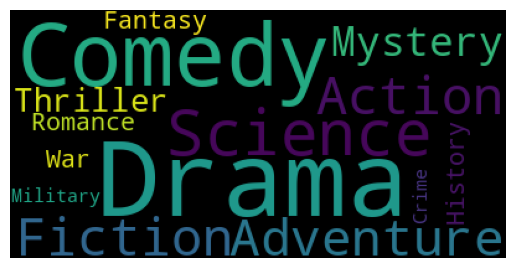

In [ ]:
#Let's Visvalize it using word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

word = " ".join(new_movies_dataframe['GENRE'])

word_cloud2 = WordCloud(background_color='black').generate(word)

plt.imshow(word_cloud2)
plt.axis("off")
plt.show()


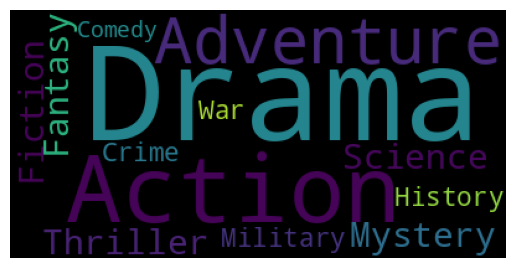

In [ ]:
#Let's Visvalize it using word cloud

word = " ".join(new_tv_shows_dataframe['GENRE'])

word_cloud2 = WordCloud(background_color='black').generate(word)

plt.imshow(word_cloud2)
plt.axis("off")
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here

mov_str = movies_dataframe["STREAMING"].value_counts()
mov_str

STREAMING
Amazon Prime Video    3
Jio Cinema            1
Apple TV              1
Name: count, dtype: int64

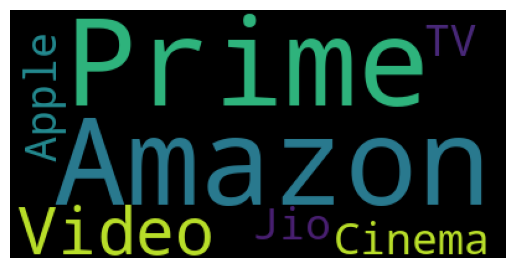

In [ ]:
#Let's Visvalize it using word cloud

stream = " ".join(movies_dataframe['STREAMING'])

word_cloud2 = WordCloud(background_color='black').generate(stream)

plt.imshow(word_cloud2)
plt.axis("off")
plt.show()

In [ ]:
# Write Your Code here

tv_shows_str = tv_shows_dataframe["STREAMING"].value_counts()
tv_shows_str

STREAMING
Hotstar               2
Amazon Prime Video    1
Netflix               1
Apple TV Plus         1
Name: count, dtype: int64

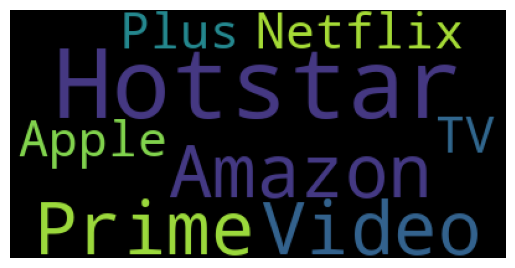

In [ ]:
#Let's Visvalize it using word cloud

stream1 = " ".join(tv_shows_dataframe['STREAMING'])

word_cloud2 = WordCloud(background_color='black').generate(stream1)

plt.imshow(word_cloud2)
plt.axis("off")
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

new_movies_dataframe.to_csv("Clean_movie_shows_data.csv")
new_tv_shows_dataframe.to_csv("Clean_tv_shows_data.csv")

In [ ]:
#saving filter data as Filter Data in csv format

filtered_movie_shows_data.to_csv("Filtered_movies_dataframe.csv")
filtered_tv_shows_data.to_csv("Filtered_tv_shows_dataframe.csv")

# **Dataset Drive Link (View Access with Anyone) -**

/content/Clean_movie_shows_data.csv

/content/Clean_tv_shows_data.csv

/content/Filtered_movies_dataframe.csv

/content/Filtered_tv_shows_dataframe.csv

# ***Congratulations!!! You have completed your Assignment.***